In [1]:
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import numpy as np
import matplotlib.pyplot as plt

In [50]:
import datetime
today = datetime.date.today().strftime("%y%m%d")

output_figures = 'figures/corr_and_linked{}_{{}}'.format(today)
output_results = 'results_new/corr_and_linked{}_{{}}'.format(today)

In [2]:
evals = pd.read_csv('data/evals_w_fdr_100kb_12k_genes.tsv', sep='\t')

In [3]:
evals.head()

,Unnamed: 0,gene,ens,in_gene,val,val2,val_clustershuffled,val2_clustershuffled,dist,pvalues,...,fdr<100kb shuffled (cluster label),pvalues2,fdr2<100kb,fdr2<200kb,fdr2<500kb,fdr2<100kb shuffled (cluster label),fdr_mcg,fdr_mcg_corr,fdr_atac,fdr_atac_corr
0,94,ENSMUSG00000000001,147662,False,-0.039720,0.044097,-0.265784,-0.136448,92177,0.424733,...,1.095838,0.450781,0.744850,0.797258,0.876520,1.032819,0.726151,0.662643,0.744850,0.721180
1,95,ENSMUSG00000000001,147663,False,0.024620,0.051756,-0.380239,-0.101215,91955,0.499490,...,0.922071,0.439489,0.738874,0.792315,0.873352,1.051270,0.770029,0.835107,0.738874,0.702838
2,96,ENSMUSG00000000001,147664,False,-0.022212,0.074516,-0.081081,-0.112376,84155,0.445065,...,1.037449,0.406090,0.720486,0.776735,0.862787,1.112977,0.738378,0.711723,0.720486,0.647348
3,97,ENSMUSG00000000001,147665,False,-0.147171,0.017398,0.194660,-0.279352,76112,0.306660,...,1.762511,0.490344,0.765055,0.813756,0.886827,0.979848,0.648328,0.367841,0.765055,0.780787
4,98,ENSMUSG00000000001,147666,False,0.122880,0.122005,0.050224,0.120910,63221,0.611919,...,0.806321,0.338683,0.679892,0.742359,0.840268,1.285390,0.829016,1.028145,0.679892,0.528936


In [4]:
corr_genes_mcg = evals.loc[evals.fdr_mcg_corr < .005].gene.unique()
linked_genes_mcg = evals.loc[evals.fdr_mcg < .2].gene.unique()
corr_genes_atac = evals.loc[evals.fdr_atac_corr < .005].gene.unique()
linked_genes_atac = evals.loc[evals.fdr_atac < .2].gene.unique()

In [5]:
corr_ens_mcg = evals.loc[evals.fdr_mcg_corr < .005].ens.unique()
linked_ens_mcg = evals.loc[evals.fdr_mcg < .2].ens.unique()
corr_ens_atac = evals.loc[evals.fdr_atac_corr < .005].ens.unique()
linked_ens_atac = evals.loc[evals.fdr_atac < .2].ens.unique()

In [6]:
evals['pair'] = evals['gene'] + ':' + evals['ens'].astype(str)

In [7]:
corr_pairs_mcg = evals.loc[evals.fdr_mcg_corr < .005].pair.unique()
linked_pairs_mcg = evals.loc[evals.fdr_mcg < .2].pair.unique()
corr_pairs_atac = evals.loc[evals.fdr_atac_corr < .005].pair.unique()
linked_pairs_atac = evals.loc[evals.fdr_atac < .2].pair.unique()

In [8]:
evals.loc[evals.fdr_mcg < .2].shape

(9054, 24)

In [9]:
corr_pairs_mcg.shape, linked_pairs_mcg.shape

((66919,), (9054,))

In [10]:
linked_pairs_atac.shape

(3880,)

In [11]:
corr_pairs_atac.shape

(18593,)

# set up colors

In [12]:
cm = plt.cm.tab20c.colors
colors_mc = [cm[8], cm[10]]
colors_atac = [cm[0], cm[2]]

In [15]:
from matplotlib_venn import venn2
# from venn import venn

# Get latest version of corr diagrams

In [16]:
evals.head()

,Unnamed: 0,gene,ens,in_gene,val,val2,val_clustershuffled,val2_clustershuffled,dist,pvalues,...,pvalues2,fdr2<100kb,fdr2<200kb,fdr2<500kb,fdr2<100kb shuffled (cluster label),fdr_mcg,fdr_mcg_corr,fdr_atac,fdr_atac_corr,pair
0,94,ENSMUSG00000000001,147662,False,-0.039720,0.044097,-0.265784,-0.136448,92177,0.424733,...,0.450781,0.744850,0.797258,0.876520,1.032819,0.726151,0.662643,0.744850,0.721180,ENSMUSG00000000001:147662
1,95,ENSMUSG00000000001,147663,False,0.024620,0.051756,-0.380239,-0.101215,91955,0.499490,...,0.439489,0.738874,0.792315,0.873352,1.051270,0.770029,0.835107,0.738874,0.702838,ENSMUSG00000000001:147663
2,96,ENSMUSG00000000001,147664,False,-0.022212,0.074516,-0.081081,-0.112376,84155,0.445065,...,0.406090,0.720486,0.776735,0.862787,1.112977,0.738378,0.711723,0.720486,0.647348,ENSMUSG00000000001:147664
3,97,ENSMUSG00000000001,147665,False,-0.147171,0.017398,0.194660,-0.279352,76112,0.306660,...,0.490344,0.765055,0.813756,0.886827,0.979848,0.648328,0.367841,0.765055,0.780787,ENSMUSG00000000001:147665
4,98,ENSMUSG00000000001,147666,False,0.122880,0.122005,0.050224,0.120910,63221,0.611919,...,0.338683,0.679892,0.742359,0.840268,1.285390,0.829016,1.028145,0.679892,0.528936,ENSMUSG00000000001:147666


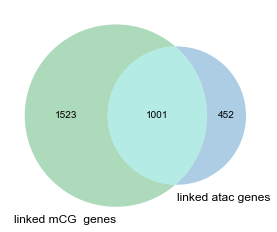

In [17]:
fig, ax = plt.subplots()
venn2([set(linked_genes_mcg), set(linked_genes_atac)],
      set_labels=['linked mCG  genes', 'linked atac genes'],
      set_colors=[colors_mc[0], colors_atac[0]]
     )

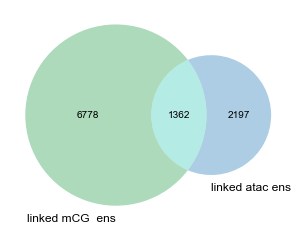

In [18]:
fig, ax = plt.subplots()
venn2([set(linked_ens_mcg), set(linked_ens_atac)],
      set_labels=['linked mCG  ens', 'linked atac ens'],
      set_colors=[colors_mc[0], colors_atac[0]]
     )

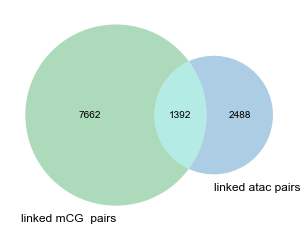

In [19]:
fig, ax = plt.subplots()
venn2([set(linked_pairs_mcg), set(linked_pairs_atac)],
      set_labels=['linked mCG  pairs', 'linked atac pairs'],
      set_colors=[colors_mc[0], colors_atac[0]]
     )

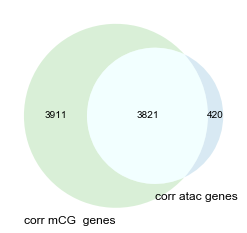

In [20]:
fig, ax = plt.subplots()
venn2([set(corr_genes_mcg), set(corr_genes_atac)],
      set_labels=['corr mCG  genes', 'corr atac genes'],
      set_colors=[colors_mc[1], colors_atac[1]]
     )

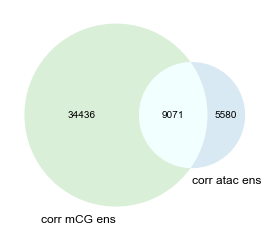

In [21]:
fig, ax = plt.subplots()
venn2([set(corr_ens_mcg), set(corr_ens_atac)],
      set_labels=['corr mCG ens', 'corr atac ens'],
      set_colors=[colors_mc[1], colors_atac[1]]
     )

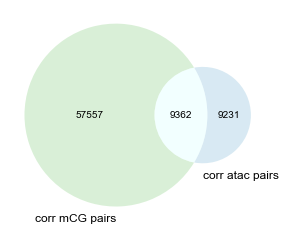

In [22]:
fig, ax = plt.subplots()
venn2([set(corr_pairs_mcg), set(corr_pairs_atac)],
      set_labels=['corr mCG pairs', 'corr atac pairs'],
      set_colors=[colors_mc[1], colors_atac[1]]
     )

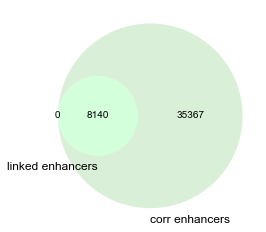

In [23]:
fig, ax = plt.subplots()
venn2([set(linked_ens_mcg), set(corr_ens_mcg)],
      set_labels=['linked enhancers', 'corr enhancers'],
      set_colors=[colors_mc[0], colors_mc[1]]
     )

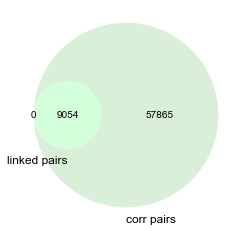

In [24]:
fig, ax = plt.subplots()
venn2([set(linked_pairs_mcg), set(corr_pairs_mcg)],
      set_labels=['linked pairs', 'corr pairs'],
      set_colors=[colors_mc[0], colors_mc[1]]
     )

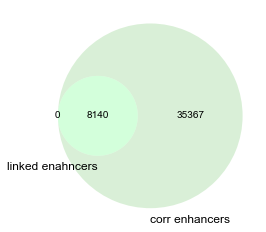

In [25]:
fig, ax = plt.subplots()
venn2([set(linked_ens_mcg), set(corr_ens_mcg)],
      set_labels=['linked enahncers', 'corr enhancers'],
      set_colors=[colors_mc[0], colors_mc[1]]
     )

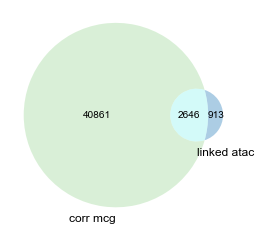

In [26]:
fig, ax = plt.subplots()
venn2([set(corr_ens_mcg),  set(linked_ens_atac)],
      set_labels=[ 'corr mcg', 'linked atac'],
      set_colors=[colors_mc[1], 
                  colors_atac[0]] 
     )

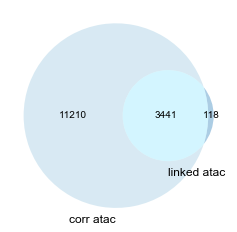

In [27]:
fig, ax = plt.subplots()
venn2([set(corr_ens_atac), set(linked_ens_atac)],
      set_labels=[ 'corr atac', 'linked atac'],
      set_colors=[colors_atac[1], colors_atac[0]] 
     )

# plot numer of enhs in atac vs number of enhs in mcg

In [29]:
all_pairs = evals.loc[np.logical_or((evals.fdr_mcg < .2), (evals.fdr_atac < .2))]

In [30]:
paired_genes = all_pairs.gene.unique()

In [31]:
paired_genes.shape

(2976,)

In [32]:
mcg_pairs = evals.loc[evals.fdr_mcg < .2]

In [33]:
atac_pairs = evals.loc[evals.fdr_atac < .2]

In [34]:
mcg_x = mcg_pairs.gene.value_counts()

In [35]:
atac_x = atac_pairs.gene.value_counts()

In [36]:
mcg_x.shape

(2524,)

In [38]:
mcg_x = mcg_x.reindex(paired_genes).fillna(0)

In [40]:
atac_x = atac_x.reindex(paired_genes).fillna(0)

In [41]:
paire_ens = all_pairs.ens.unique()
mcg_y = mcg_pairs.ens.value_counts()
atac_y = atac_pairs.ens.value_counts()

In [43]:
mcg_y = mcg_y.reindex(paire_ens).fillna(0)
atac_y = atac_y.reindex(paire_ens).fillna(0)

(array([2197.,    0., 7352.,    0.,    0.,  690.,    0.,   70.,    0.,
          28.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

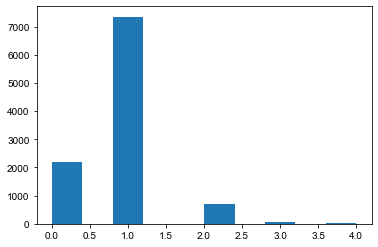

In [44]:
plt.hist(mcg_y)

(array([6.778e+03, 0.000e+00, 3.270e+03, 0.000e+00, 2.640e+02, 0.000e+00,
        1.900e+01, 0.000e+00, 5.000e+00, 1.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

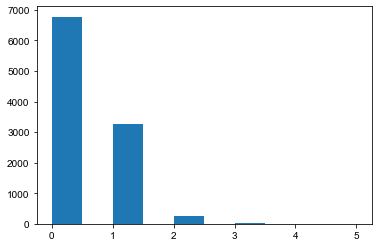

In [45]:
plt.hist(atac_y)

In [46]:
def scatter_density(x, y, p=1):
    """
    """
    from scipy.stats import gaussian_kde
    
    n = len(x)
    assert n == len(y)
    if p < 1:
        selected = np.random.rand(n) < p
        _x = x[selected]
        _y = y[selected]
    else:
        _x = x
        _y = y
        
    _xy = np.vstack([_x, _y])
    xy = np.vstack([x, y])
    z = gaussian_kde(_xy)(xy)
    return z 

In [47]:
mcg_x.shape

(2976,)

In [48]:
z = scatter_density(mcg_x.values, atac_x.values)

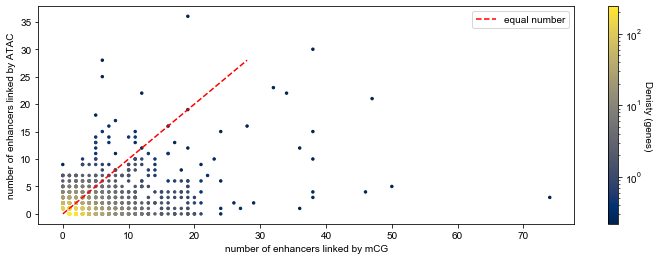

In [51]:
fig, ax = plt.subplots(figsize =(12, 4))
im = ax.scatter(mcg_x, atac_x, s=6, rasterized=True, c=z*mcg_x.shape[0], cmap='cividis', label='',
               norm=mpl.colors.LogNorm())
cbar = ax.figure.colorbar(im, ax=ax)
ax.plot(np.arange(29), np.arange(29), '--', c='red', label='equal number')
cbar.set_label('Denisty (genes)',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('number of enhancers linked by mCG')
ax.set_ylabel('number of enhancers linked by ATAC')
plt.legend()
fig.savefig(output_figures.format('number_enhancer_per_gene_wide.pdf'), bbox_inches='tight', dpi=300)


In [53]:
z_y = scatter_density(mcg_y.values, atac_y.values)

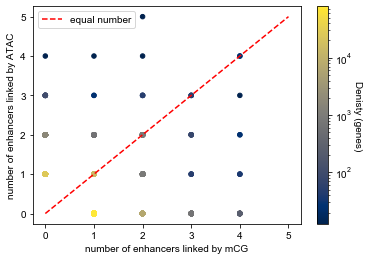

In [55]:
fig, ax = plt.subplots(figsize =(6, 4))
im = ax.scatter(mcg_y, atac_y, s=20, rasterized=True, c=z_y*mcg_y.shape[0], cmap='cividis', label='',
               norm=mpl.colors.LogNorm())
cbar = ax.figure.colorbar(im, ax=ax)
ax.plot(np.arange(6), np.arange(6), '--', c='red', label='equal number')
cbar.set_label('Denisty (genes)',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('number of enhancers linked by mCG')
ax.set_ylabel('number of enhancers linked by ATAC')
plt.legend()
fig.savefig(output_figures.format('number_gene_per_enhancer.pdf'), bbox_inches='tight', dpi=300)


In [56]:
from scipy.stats import spearmanr

In [57]:
spearmanr(mcg_y.values, atac_y.values)

SpearmanrResult(correlation=-0.6075264158374968, pvalue=0.0)

# explore overpairing of corr data

In [58]:
corr_pairs = evals.loc[np.logical_or((evals.fdr_mcg_corr < .005), (evals.fdr_atac_corr < .005))]
mcg_corr = evals.loc[evals.fdr_mcg_corr < .005]
atac_corr = evals.loc[evals.fdr_atac_corr < .005]

In [59]:
corr_genes = corr_pairs.gene.unique()
corr_ens = corr_pairs.ens.unique()

In [60]:
atac_corr.shape

(18593, 24)

In [61]:
mcg_corr.shape

(66919, 24)

In [62]:
mcg_x_corr = mcg_corr.gene.value_counts()
mcg_y_corr = mcg_corr.ens.value_counts()

In [63]:
atac_x_corr = atac_corr.gene.value_counts()
atac_y_corr = atac_corr.ens.value_counts()

In [65]:
mcg_x_corr = mcg_x_corr.reindex(corr_genes).fillna(0)
atac_x_corr = atac_x_corr.reindex(corr_genes).fillna(0)

mcg_y_corr = mcg_y_corr.reindex(corr_ens).fillna(0)
atac_y_corr = atac_y_corr.reindex(corr_ens).fillna(0)

In [66]:
z_corr = scatter_density(mcg_x_corr.values, atac_x_corr.values)

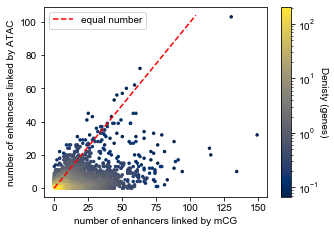

In [67]:
fig, ax = plt.subplots(figsize =(5, 3.5))
im = ax.scatter(mcg_x_corr, atac_x_corr, s=6, 
                rasterized=True, 
                c=z_corr*mcg_x_corr.shape[0],
                cmap='cividis', label='',
               norm=mpl.colors.LogNorm())
cbar = ax.figure.colorbar(im, ax=ax)
ax.plot(np.arange(105), np.arange(105),
        '--', c='red', label='equal number')
cbar.set_label('Denisty (genes)',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('number of enhancers linked by mCG')
ax.set_ylabel('number of enhancers linked by ATAC')
plt.legend()
fig.savefig(output_figures.format('number_enhancer_per_gene_corr_wide.pdf'), 
            bbox_inches='tight', dpi=300)

In [68]:
z_y_corr = scatter_density(mcg_y_corr.values, atac_y_corr.values)

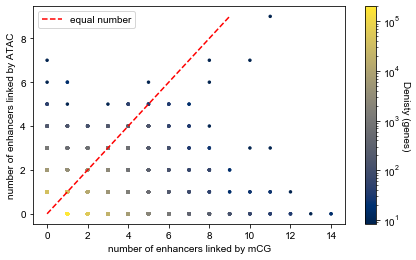

In [69]:
fig, ax = plt.subplots(figsize =(7, 4))
im = ax.scatter(mcg_y_corr, atac_y_corr, s=6, rasterized=True, c=z_y_corr*mcg_y_corr.shape[0], cmap='cividis', label='',
               norm=mpl.colors.LogNorm())
cbar = ax.figure.colorbar(im, ax=ax)
ax.plot(np.arange(10), np.arange(10), '--', c='red', label='equal number')
cbar.set_label('Denisty (genes)',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('number of enhancers linked by mCG')
ax.set_ylabel('number of enhancers linked by ATAC')
plt.legend()
fig.savefig(output_figures.format('number_gene_per_enhancer_corr.pdf'), 
            bbox_inches='tight', dpi=300)


In [70]:
np.sum(mcg_x_corr>1)/mcg_x_corr.shape

array([0.73478901])

In [71]:
np.sum(mcg_x>1)/mcg_x.shape

array([0.48219086])

In [72]:
np.sum(mcg_y_corr>1)/np.sum(mcg_y_corr>0)

0.33537131955777233

In [73]:
np.sum(mcg_y>1)/mcg_y.shape

array([0.07623101])

In [74]:
np.sum(atac_y_corr>1)/np.sum(atac_y_corr>0)

0.20496894409937888

In [75]:
atac_y_corr.shape

(49087,)

(array([3.4496e+04, 9.2200e+03, 4.6160e+03, 4.0700e+02, 1.8000e+02,
        1.1900e+02, 1.8000e+01, 2.3000e+01, 5.0000e+00, 3.0000e+00]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 10 Patch objects>)

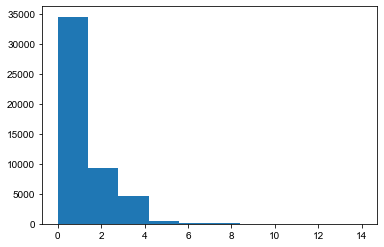

In [76]:
plt.hist(mcg_y_corr)

(array([3.4436e+04, 1.1648e+04, 2.2840e+03, 5.4700e+02, 1.3900e+02,
        2.4000e+01, 5.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

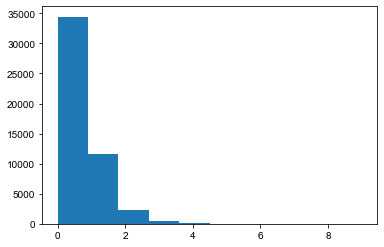

In [77]:
plt.hist(atac_y_corr)

In [78]:
atac_x_corr.max()

103.0

In [79]:
evals.shape

(875777, 24)

In [80]:
evals.dist.max()

500000

In [81]:
mcg_x_corr.max()

149.0

# get latest Venn diagrams

# get bedfiles

In [82]:
bedfile = pd.read_csv('/cndd2/ethan/projects/enh_gene_linkage/data/enhancer_ethan38_200520/enhancer/enhancers_chromsort_slop1kb.bed', sep='\t', header=None)

In [83]:
bedfile = pd.read_csv('/cndd2/ethan/projects/enh_gene_linkage/data/enhancer_ethan38_200520/enhancer/enhancers_chromsort.bed', sep='\t', header=None)

In [84]:
bedfile.head()

,0,1,2
0,chr1,3083769,3083816
1,chr1,3112234,3112467
2,chr1,3112770,3112986
3,chr1,3113717,3114035
4,chr1,3118790,3118935


In [85]:
bedfile[4] = bedfile.index

In [ ]:
# bedfile.to_csv('/cndd2/ethan/projects/enh_gene_linkage/enhancer_bed.bed.gz', index=None, columns=None,compression='gzip', sep='\t')

In [90]:
corr_ens_mcg
linked_ens_mcg
corr_ens_atac
linked_ens_atac

array([181997, 138815, 192550, ..., 211130,   7766, 175057])

In [91]:
corr_mcg_bed = bedfile.loc[corr_ens_mcg]

In [92]:
corr_mcg_bed.shape

(43507, 4)

In [93]:
linked_mcg_bed = bedfile.loc[linked_ens_mcg]
linked_atac_bed = bedfile.loc[linked_ens_atac]
corr_atac_bed = bedfile.loc[corr_ens_mcg]

In [94]:
linked_mcg_bed.shape

(8140, 4)

In [95]:
linked_atac_bed.shape

(3559, 4)

# compare motifs in gene body

In [96]:
evals.head()

,Unnamed: 0,gene,ens,in_gene,val,val2,val_clustershuffled,val2_clustershuffled,dist,pvalues,...,pvalues2,fdr2<100kb,fdr2<200kb,fdr2<500kb,fdr2<100kb shuffled (cluster label),fdr_mcg,fdr_mcg_corr,fdr_atac,fdr_atac_corr,pair
0,94,ENSMUSG00000000001,147662,False,-0.039720,0.044097,-0.265784,-0.136448,92177,0.424733,...,0.450781,0.744850,0.797258,0.876520,1.032819,0.726151,0.662643,0.744850,0.721180,ENSMUSG00000000001:147662
1,95,ENSMUSG00000000001,147663,False,0.024620,0.051756,-0.380239,-0.101215,91955,0.499490,...,0.439489,0.738874,0.792315,0.873352,1.051270,0.770029,0.835107,0.738874,0.702838,ENSMUSG00000000001:147663
2,96,ENSMUSG00000000001,147664,False,-0.022212,0.074516,-0.081081,-0.112376,84155,0.445065,...,0.406090,0.720486,0.776735,0.862787,1.112977,0.738378,0.711723,0.720486,0.647348,ENSMUSG00000000001:147664
3,97,ENSMUSG00000000001,147665,False,-0.147171,0.017398,0.194660,-0.279352,76112,0.306660,...,0.490344,0.765055,0.813756,0.886827,0.979848,0.648328,0.367841,0.765055,0.780787,ENSMUSG00000000001:147665
4,98,ENSMUSG00000000001,147666,False,0.122880,0.122005,0.050224,0.120910,63221,0.611919,...,0.338683,0.679892,0.742359,0.840268,1.285390,0.829016,1.028145,0.679892,0.528936,ENSMUSG00000000001:147666


In [97]:
all_linked = evals.loc[evals.pair.isin(np.union1d(linked_pairs_mcg, linked_pairs_atac))]

In [98]:
all_corr = evals.loc[evals.pair.isin(np.union1d(corr_pairs_mcg, corr_pairs_atac))]

In [99]:
all_linked.shape

(11542, 24)

In [100]:
all_corr.shape

(76150, 24)

In [101]:
all_linked.head()

,Unnamed: 0,gene,ens,in_gene,val,val2,val_clustershuffled,val2_clustershuffled,dist,pvalues,...,pvalues2,fdr2<100kb,fdr2<200kb,fdr2<500kb,fdr2<100kb shuffled (cluster label),fdr_mcg,fdr_mcg_corr,fdr_atac,fdr_atac_corr,pair
36,312,ENSMUSG00000000058,181997,False,-0.822300,0.641974,0.022431,-0.248277,14555,0.000232,...,0.003802,0.185491,0.255928,0.400644,351.878628,0.041971,0.0,0.185491,0.000478,ENSMUSG00000000058:181997
80,815,ENSMUSG00000000088,221978,False,-0.733888,0.333625,-0.094212,-0.288544,48225,0.002848,...,0.108805,0.480110,0.567444,0.710692,4.236067,0.125146,0.0,0.480110,0.113334,ENSMUSG00000000088:221978
84,949,ENSMUSG00000000126,35942,False,-0.692527,0.490535,0.101433,0.227049,90017,0.006006,...,0.028939,0.330362,0.416450,0.579218,21.934181,0.164867,0.0,0.330362,0.015050,ENSMUSG00000000126:35942
90,955,ENSMUSG00000000126,35953,True,-0.756647,0.171901,0.130539,0.235803,4552,0.001733,...,0.272604,0.635610,0.704560,0.814042,1.567062,0.101769,0.0,0.635610,0.405604,ENSMUSG00000000126:35953
91,956,ENSMUSG00000000126,35954,True,-0.691651,0.304081,0.276726,0.305394,5567,0.006091,...,0.132688,0.511194,0.595842,0.734204,3.399818,0.165725,0.0,0.511194,0.150355,ENSMUSG00000000126:35954


In [102]:
np.union1d(corr_pairs_mcg, corr_pairs_atac).shape

(76150,)

In [103]:
all_linked.shape

(11542, 24)

In [104]:
in_gene_linked = all_linked.loc[all_linked.in_gene]

In [105]:
in_gene_corr = all_corr.loc[all_corr.in_gene]

In [106]:
out_gene_corr = all_corr.loc[~all_corr.in_gene]

In [107]:
out_gene_linked = all_linked.loc[~all_linked.in_gene]

In [108]:
in_gene_linked.shape

(6354, 24)

In [109]:
out_gene_linked.shape

(5188, 24)

In [110]:
bedfile.head()

,0,1,2,4
0,chr1,3083769,3083816,0
1,chr1,3112234,3112467,1
2,chr1,3112770,3112986,2
3,chr1,3113717,3114035,3
4,chr1,3118790,3118935,4


In [ ]:
all_linked.head()

In [111]:
all_corr.head()

,Unnamed: 0,gene,ens,in_gene,val,val2,val_clustershuffled,val2_clustershuffled,dist,pvalues,...,pvalues2,fdr2<100kb,fdr2<200kb,fdr2<500kb,fdr2<100kb shuffled (cluster label),fdr_mcg,fdr_mcg_corr,fdr_atac,fdr_atac_corr,pair
35,311,ENSMUSG00000000058,181996,False,-0.388992,0.573039,-0.174527,-0.136886,16524,0.105760,...,0.010817,0.250931,0.329669,0.486347,103.890213,0.452836,0.028328,0.250931,0.002392,ENSMUSG00000000058:181996
36,312,ENSMUSG00000000058,181997,False,-0.822300,0.641974,0.022431,-0.248277,14555,0.000232,...,0.003802,0.185491,0.255928,0.400644,351.878628,0.041971,0.000000,0.185491,0.000478,ENSMUSG00000000058:181997
53,654,ENSMUSG00000000085,162669,False,-0.504322,0.084145,0.074297,-0.080425,72160,0.049448,...,0.392456,0.712882,0.770515,0.858981,1.141826,0.350917,0.004002,0.712882,0.624334,ENSMUSG00000000085:162669
58,659,ENSMUSG00000000085,162677,True,-0.576102,0.620309,-0.075829,-0.102965,27594,0.026275,...,0.005455,0.207359,0.280964,0.430892,293.093294,0.285030,0.000679,0.207359,0.000669,ENSMUSG00000000085:162677
71,806,ENSMUSG00000000088,221965,False,-0.611117,0.453332,-0.021994,-0.035343,35028,0.018217,...,0.041670,0.363678,0.451996,0.613282,13.376857,0.251268,0.000201,0.363678,0.027178,ENSMUSG00000000088:221965


In [112]:
bedfile.head()

,0,1,2,4
0,chr1,3083769,3083816,0
1,chr1,3112234,3112467,1
2,chr1,3112770,3112986,2
3,chr1,3113717,3114035,3
4,chr1,3118790,3118935,4


In [113]:
!pwd

/sphere/fangming/enhancers/scripts


In [115]:
in_gene_bed = bedfile.loc[in_gene_linked.ens]

out_gene_bed = bedfile.loc[out_gene_linked.ens]

# in_gene_bed.to_csv('/cndd2/ethan/projects/enh_gene_linkage/motifs/data/in_gene_linked.bed',
#                     sep='\t', header=None, index=False)

# out_gene_bed.to_csv('/cndd2/ethan/projects/enh_gene_linkage/motifs/data/out_gene_linked.bed',
#                     sep='\t', header=None, index=False)

In [117]:
in_gene_bed_corr = bedfile.loc[in_gene_corr.ens.unique()]

out_gene_bed_corr = bedfile.loc[out_gene_corr.ens.unique()]

# in_gene_bed_corr.to_csv('/cndd2/ethan/projects/enh_gene_linkage/motifs/data/in_gene_corr.bed',
#                     sep='\t', header=None, index=False)

# out_gene_bed_corr.to_csv('/cndd2/ethan/projects/enh_gene_linkage/motifs/data/out_gene_corr.bed',
#                     sep='\t', header=None, index=False)

In [118]:
# corr_mcg_bed.to_csv('/cndd2/ethan/projects/enh_gene_linkage/motifs/data/corr_mcg.bed',
#                     sep='\t', header=None, index=False)
# linked_mcg_bed.to_csv('/cndd2/ethan/projects/enh_gene_linkage/motifs/data/linked_mcg.bed', 
#                       sep='\t', header=None, index=False)
# linked_atac_bed.to_csv('/cndd2/ethan/projects/enh_gene_linkage/motifs/data/corr_atac.bed', 
#                        sep='\t', header=None, index=False)
# corr_atac_bed.to_csv('/cndd2/ethan/projects/enh_gene_linkage/motifs/data/linked_atac.bed', 
#                      sep='\t', header=None, index=False)

In [119]:
evals.head()

,Unnamed: 0,gene,ens,in_gene,val,val2,val_clustershuffled,val2_clustershuffled,dist,pvalues,...,pvalues2,fdr2<100kb,fdr2<200kb,fdr2<500kb,fdr2<100kb shuffled (cluster label),fdr_mcg,fdr_mcg_corr,fdr_atac,fdr_atac_corr,pair
0,94,ENSMUSG00000000001,147662,False,-0.039720,0.044097,-0.265784,-0.136448,92177,0.424733,...,0.450781,0.744850,0.797258,0.876520,1.032819,0.726151,0.662643,0.744850,0.721180,ENSMUSG00000000001:147662
1,95,ENSMUSG00000000001,147663,False,0.024620,0.051756,-0.380239,-0.101215,91955,0.499490,...,0.439489,0.738874,0.792315,0.873352,1.051270,0.770029,0.835107,0.738874,0.702838,ENSMUSG00000000001:147663
2,96,ENSMUSG00000000001,147664,False,-0.022212,0.074516,-0.081081,-0.112376,84155,0.445065,...,0.406090,0.720486,0.776735,0.862787,1.112977,0.738378,0.711723,0.720486,0.647348,ENSMUSG00000000001:147664
3,97,ENSMUSG00000000001,147665,False,-0.147171,0.017398,0.194660,-0.279352,76112,0.306660,...,0.490344,0.765055,0.813756,0.886827,0.979848,0.648328,0.367841,0.765055,0.780787,ENSMUSG00000000001:147665
4,98,ENSMUSG00000000001,147666,False,0.122880,0.122005,0.050224,0.120910,63221,0.611919,...,0.338683,0.679892,0.742359,0.840268,1.285390,0.829016,1.028145,0.679892,0.528936,ENSMUSG00000000001:147666


In [120]:
evals.columns.values

array(['Unnamed: 0', 'gene', 'ens', 'in_gene', 'val', 'val2',
       'val_clustershuffled', 'val2_clustershuffled', 'dist', 'pvalues',
       'fdr<100kb', 'fdr<200kb', 'fdr<500kb',
       'fdr<100kb shuffled (cluster label)', 'pvalues2', 'fdr2<100kb',
       'fdr2<200kb', 'fdr2<500kb', 'fdr2<100kb shuffled (cluster label)',
       'fdr_mcg', 'fdr_mcg_corr', 'fdr_atac', 'fdr_atac_corr', 'pair'],
      dtype=object)

# get in gene body comparison 

In [121]:
in_gene_linked.ens.unique().shape[0], out_gene_linked.ens.unique().shape[0]

(6317, 4674)

In [122]:
num_ens_linked = in_gene_linked.ens.unique().shape[0] + out_gene_linked.ens.unique().shape[0]
num_ens_corr =in_gene_corr.ens.unique().shape[0] + out_gene_corr.ens.unique().shape[0]

In [123]:
in_gene_corr.ens.unique().shape[0], out_gene_corr.ens.unique().shape[0]

(19971, 36762)

In [125]:
# ?plt.bar

([<matplotlib.axis.YTick at 0x7f97973b7130>,
 <a list of 6 Text yticklabel objects>)

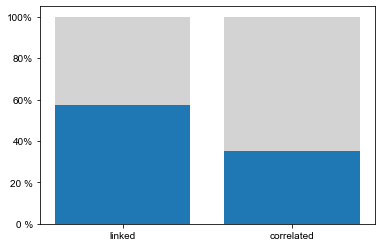

In [126]:
plt.bar([0, 1],
        [in_gene_linked.ens.unique().shape[0]/num_ens_linked,
         in_gene_corr.ens.unique().shape[0]/num_ens_corr])
plt.bar([0, 1],
        [out_gene_linked.ens.unique().shape[0]/num_ens_linked,
         out_gene_corr.ens.unique().shape[0]/num_ens_corr], 
        bottom =[in_gene_linked.ens.unique().shape[0]/num_ens_linked,
         in_gene_corr.ens.unique().shape[0]/num_ens_corr], color='lightgray')
plt.xticks([0, 1], ['linked', 'correlated'])
plt.yticks(np.array([0, 20, 40, 60, 80, 100])/100, ['0 %', '20 %', '40%', '60%', '80%', '100%'])
